In [77]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error as msle

In [2]:
data = pd.read_csv('abalone.data',sep=',',header=None)

In [3]:
data.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [4]:
data.columns =['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [5]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [8]:
train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
train = train.rename(columns={'Whole weight.1':'Shucked weight','Whole weight.2':'Viscera weight'})

In [10]:
train.head()

id Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Viscera weight  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [11]:
test.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

In [12]:
test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight'],
      dtype='object')

In [13]:
test = test.rename(columns={'Whole weight.1':'Shucked weight','Whole weight.2':'Viscera weight'})

In [14]:
test.head()

id Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Viscera weight  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Shucked weight  90615 non-null  float64
 7   Viscera weight  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
train.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

In [18]:
# EDA 

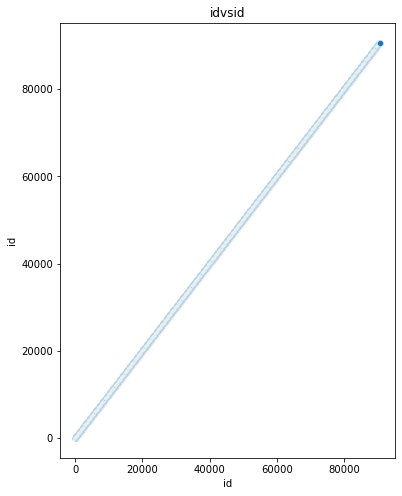

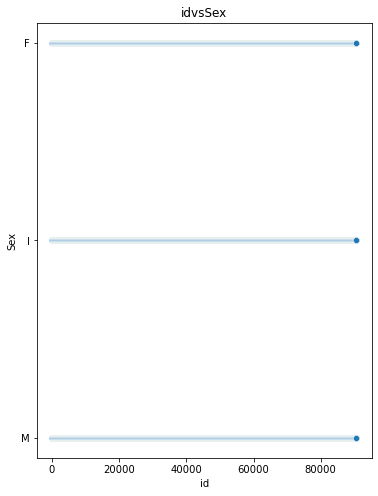

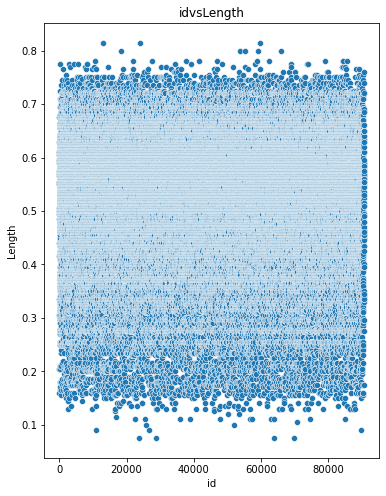

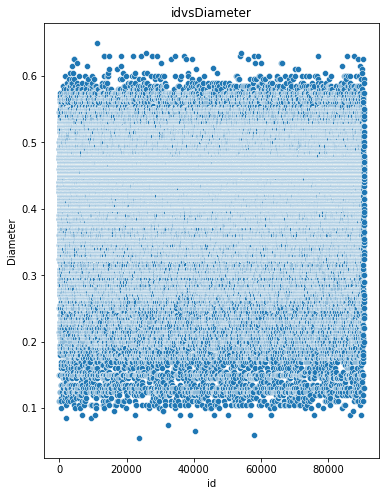

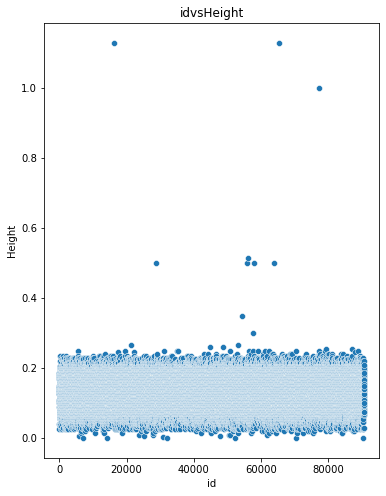

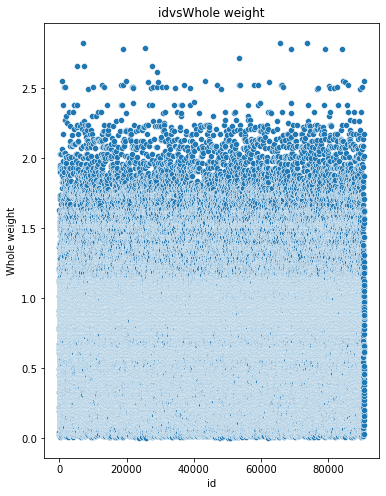

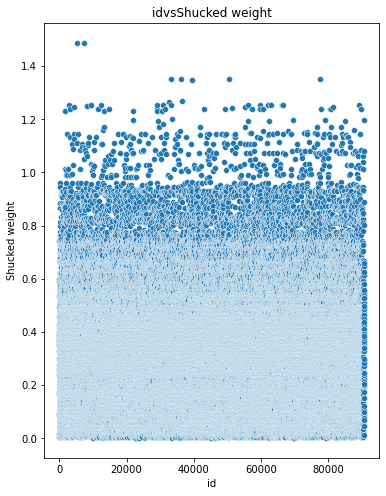

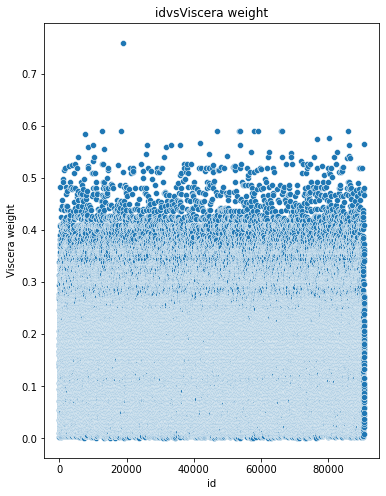

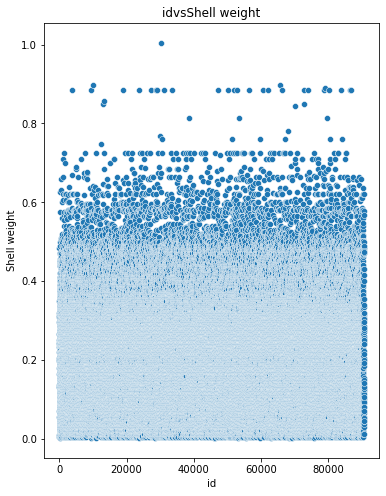

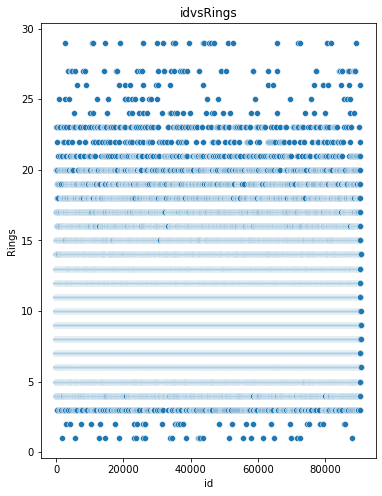

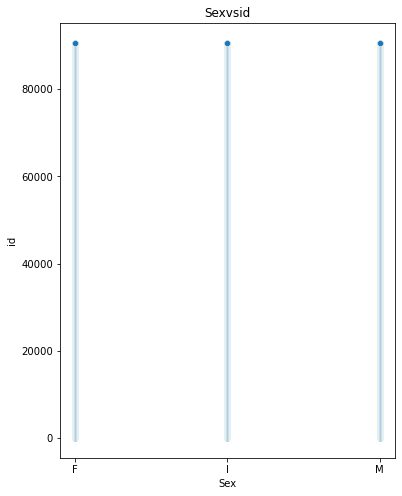

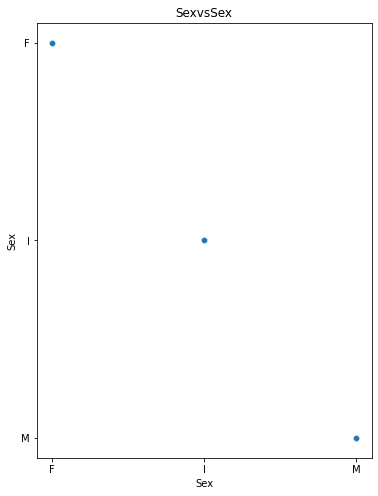

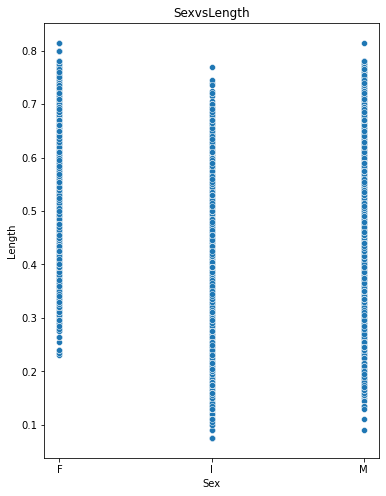

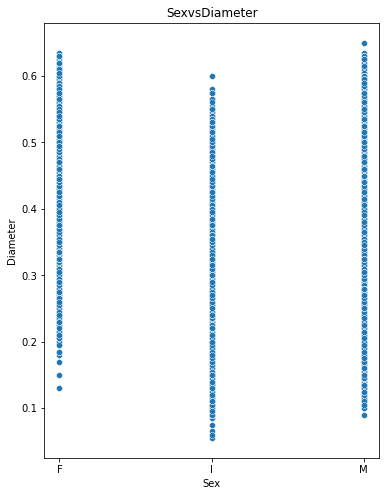

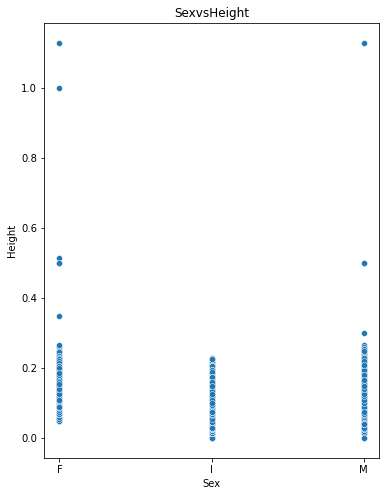

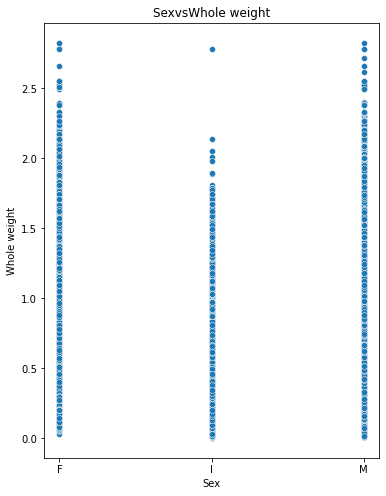

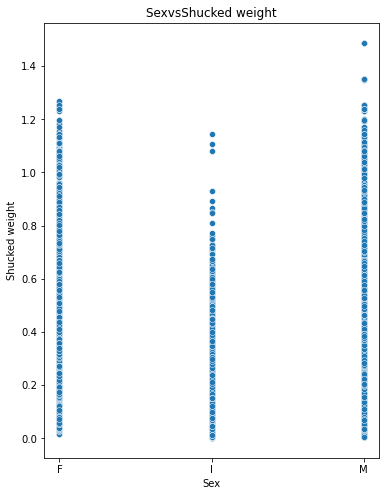

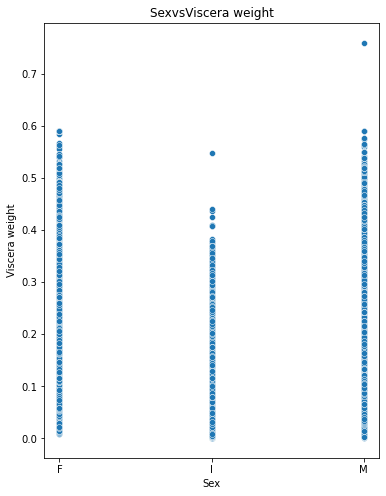

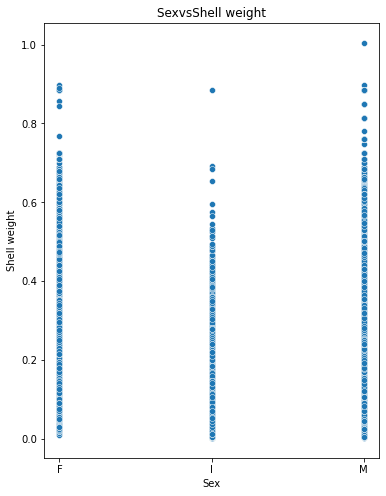

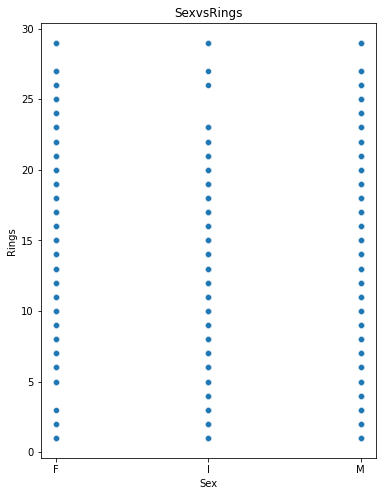

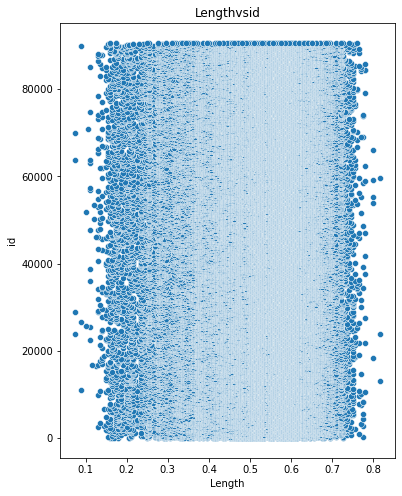

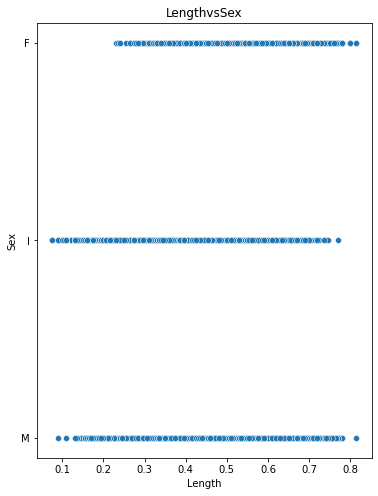

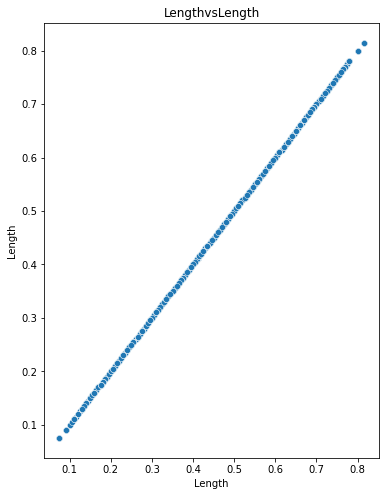

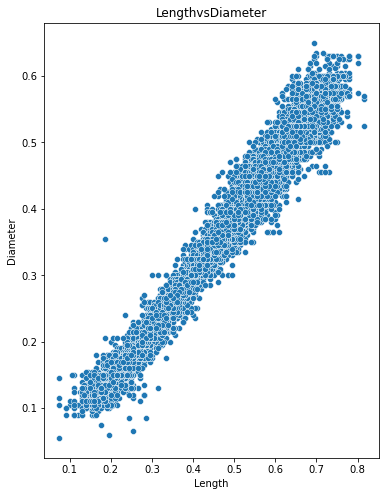

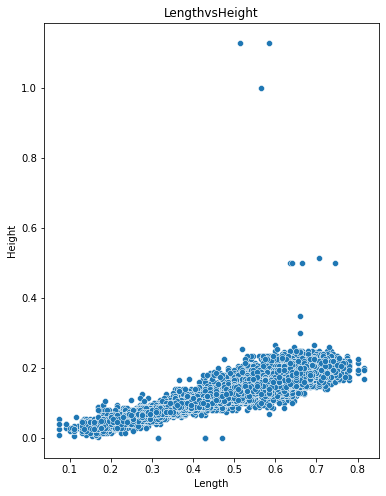

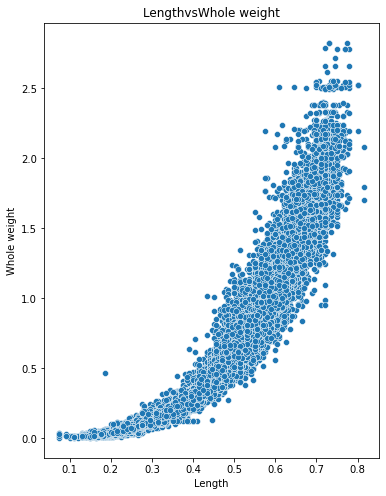

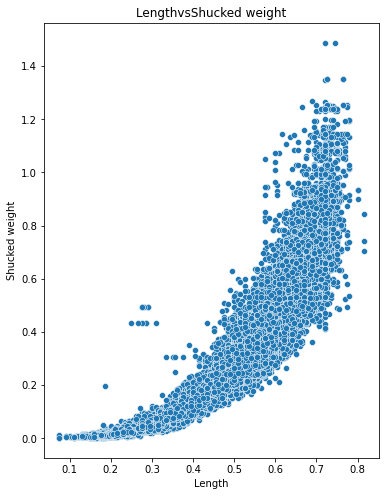

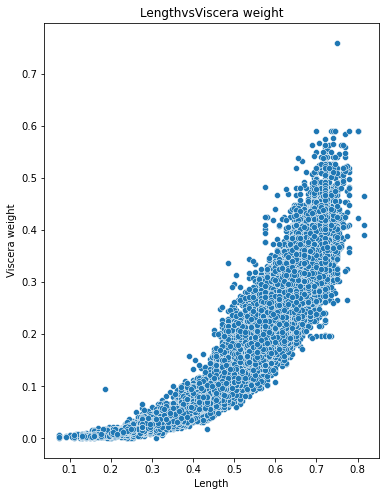

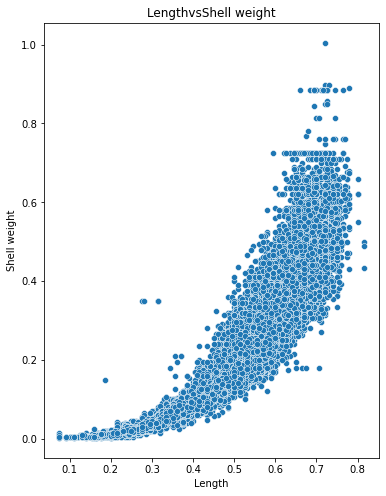

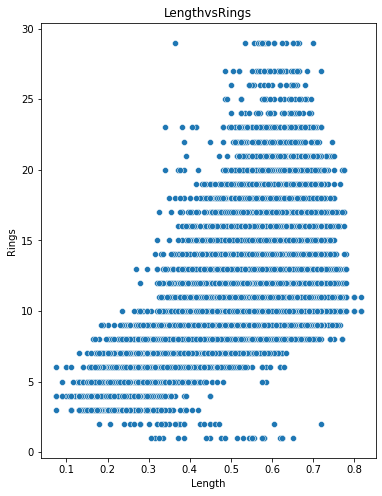

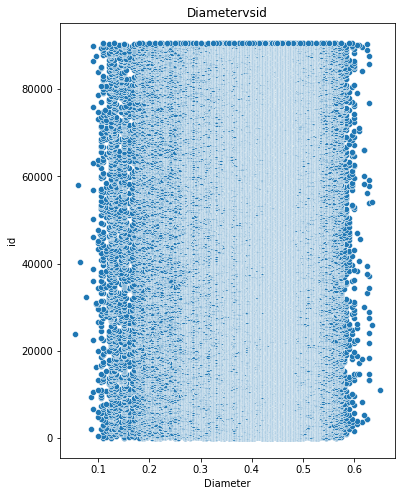

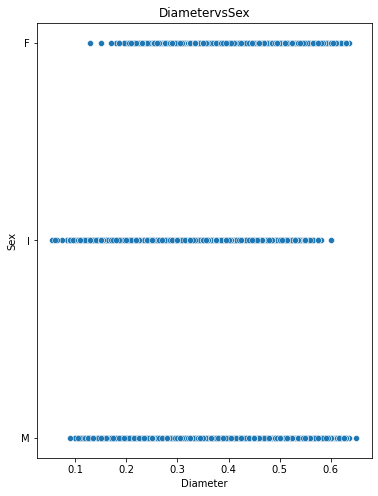

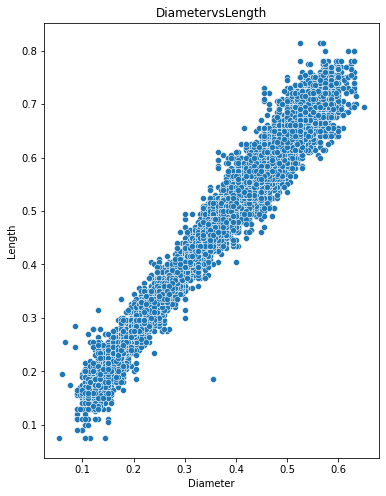

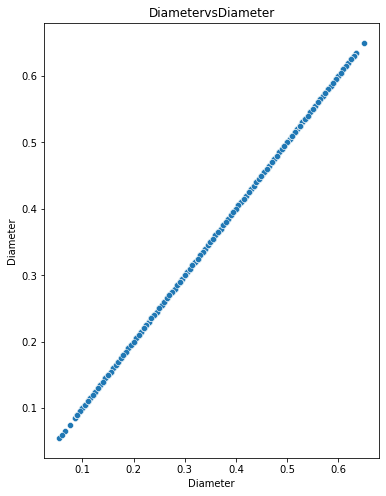

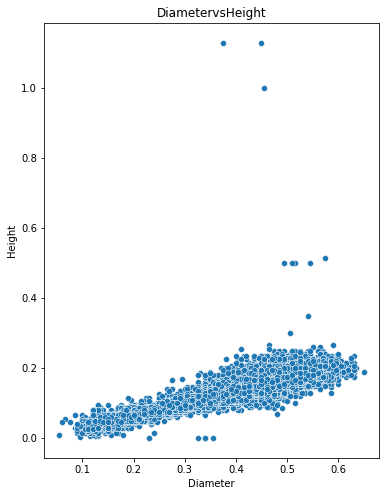

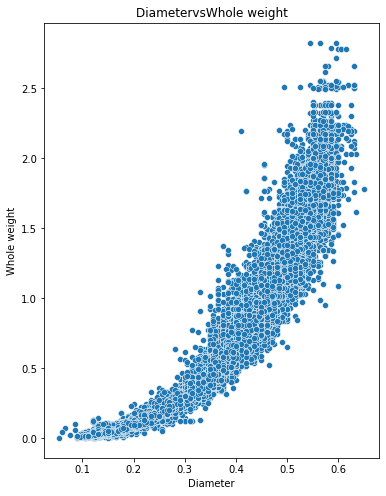

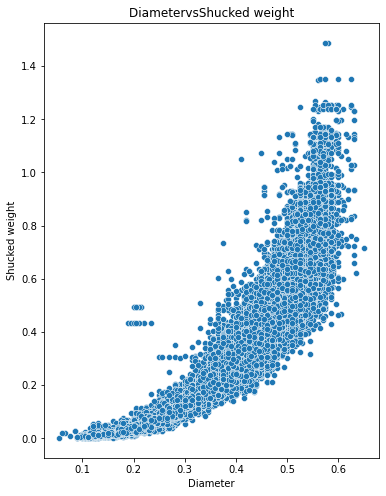

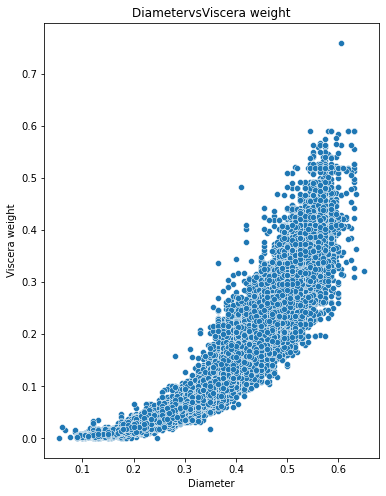

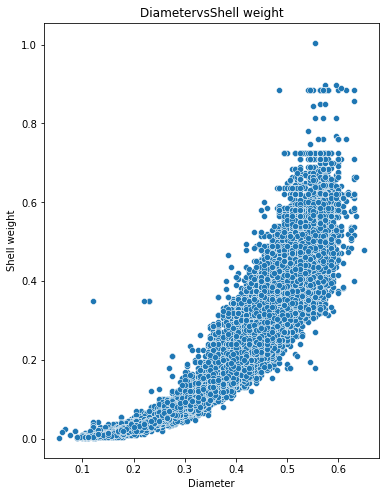

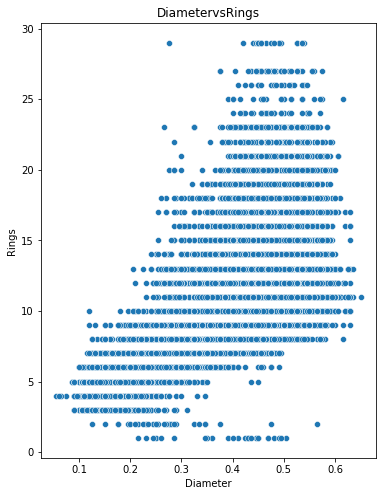

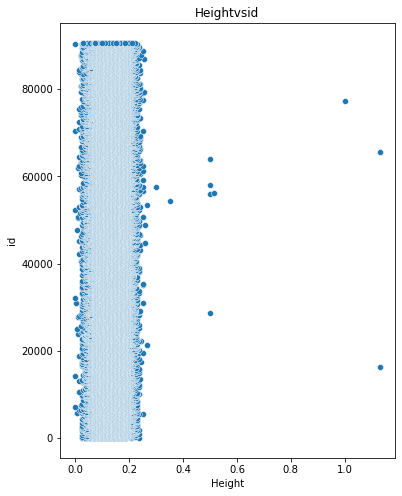

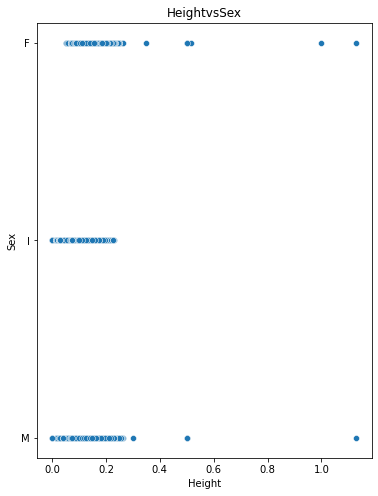

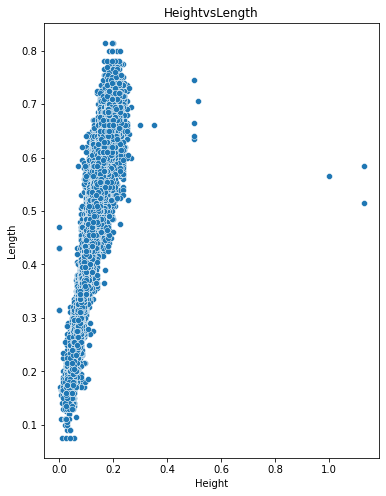

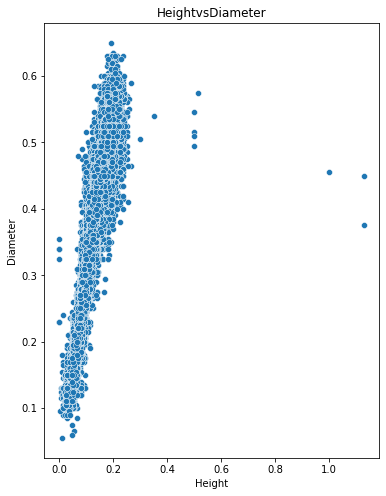

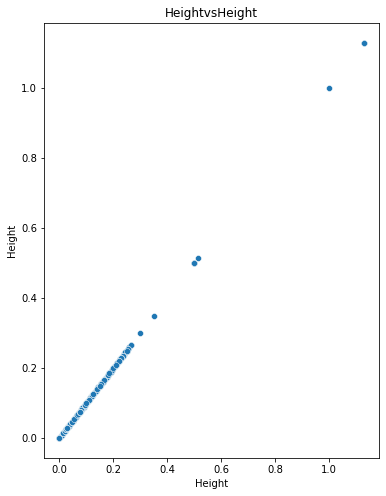

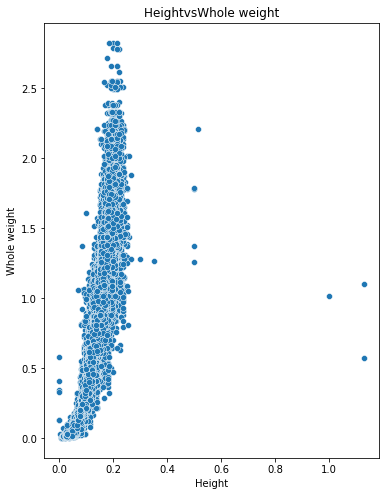

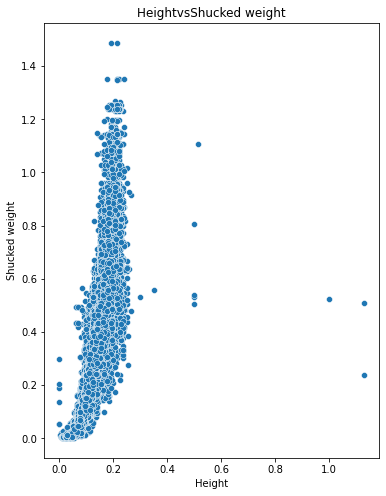

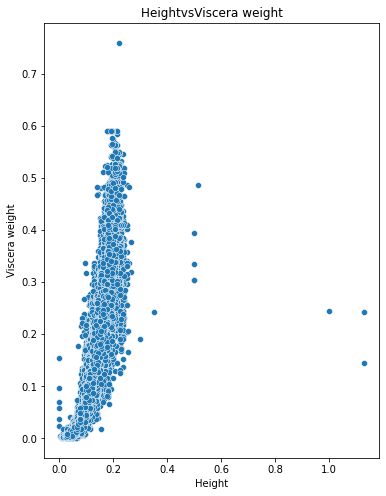

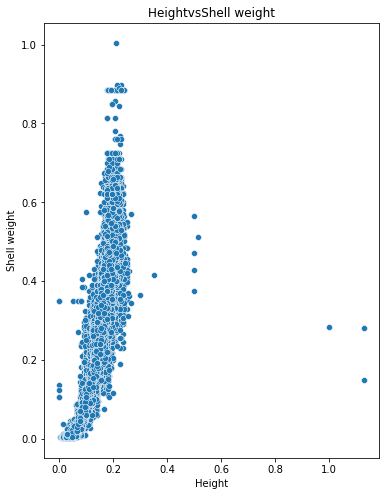

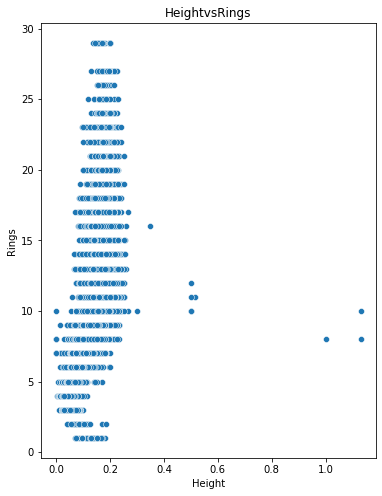

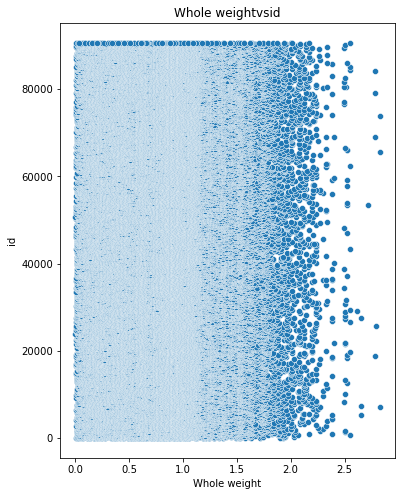

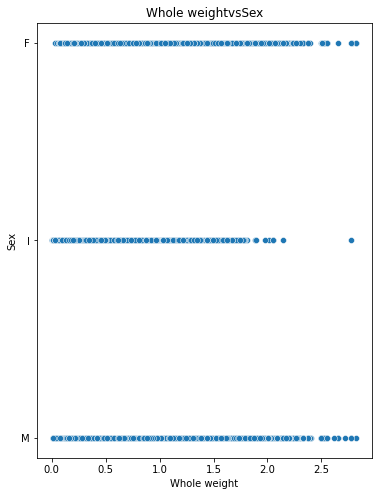

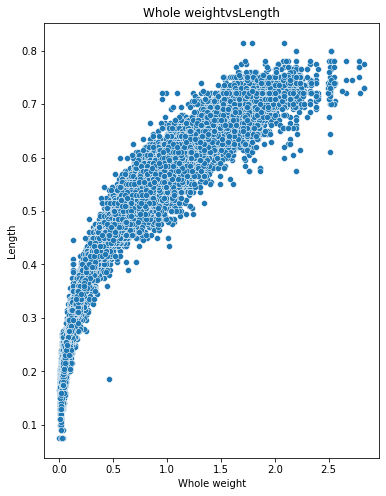

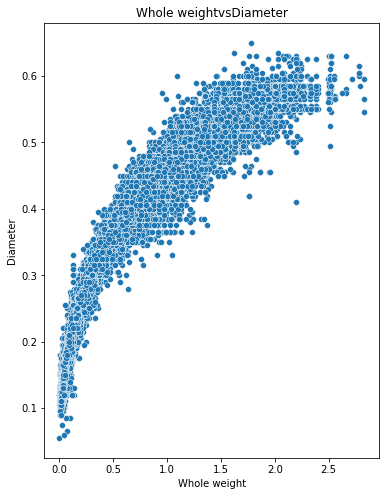

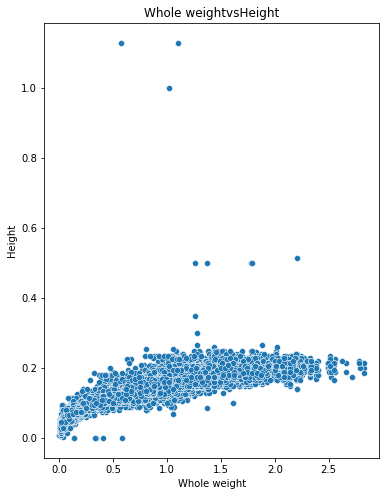

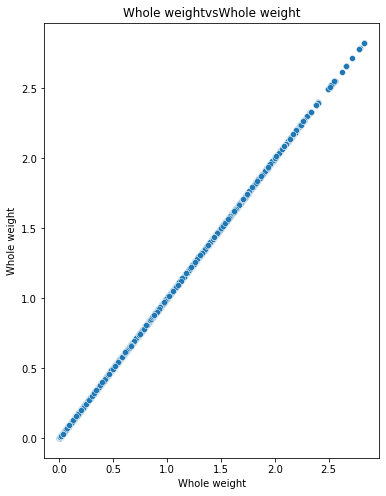

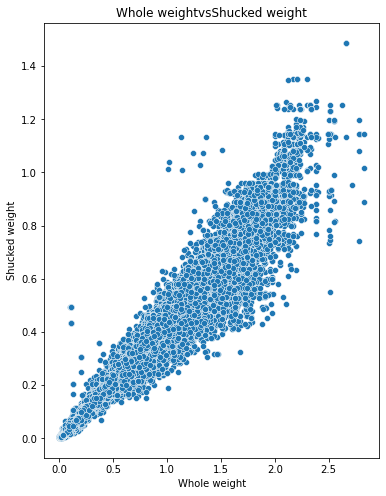

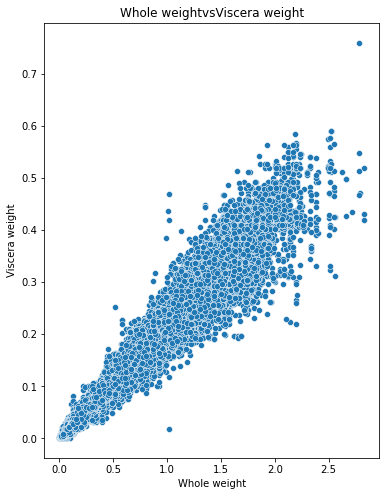

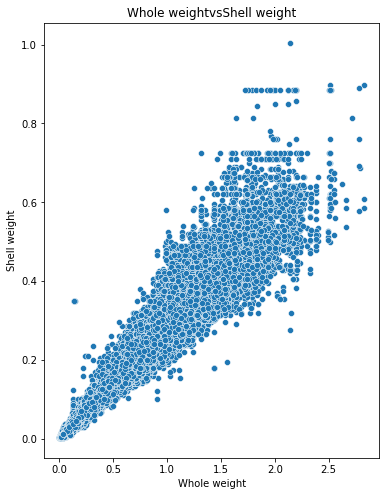

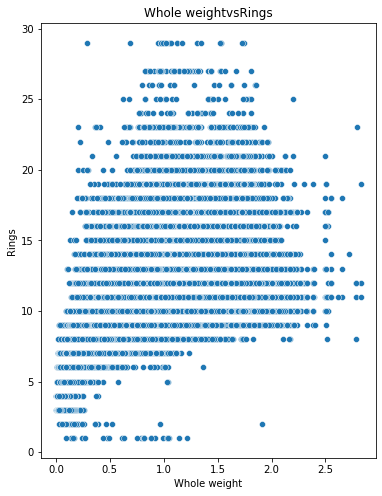

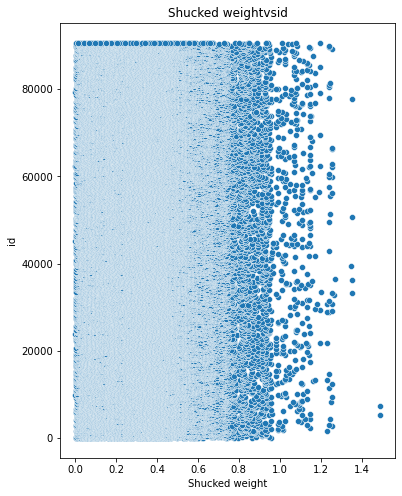

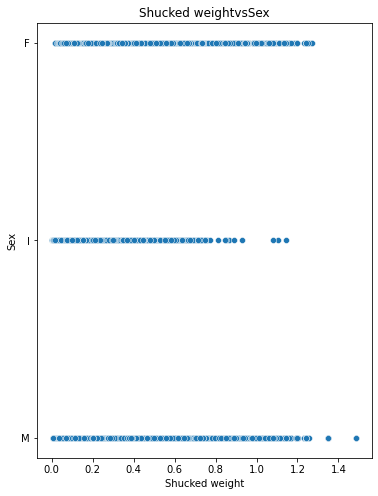

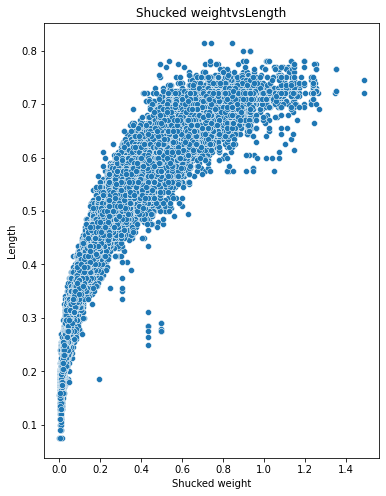

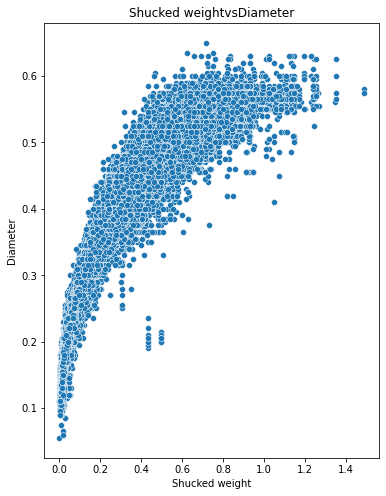

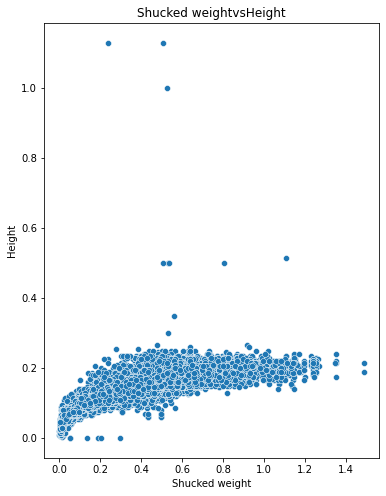

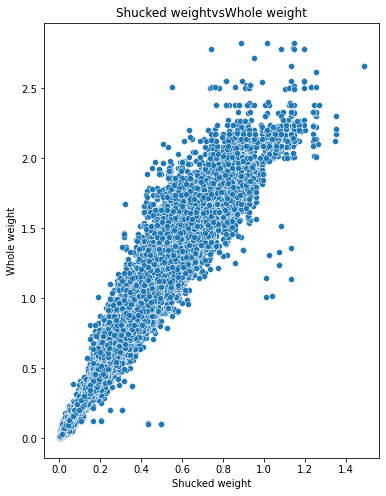

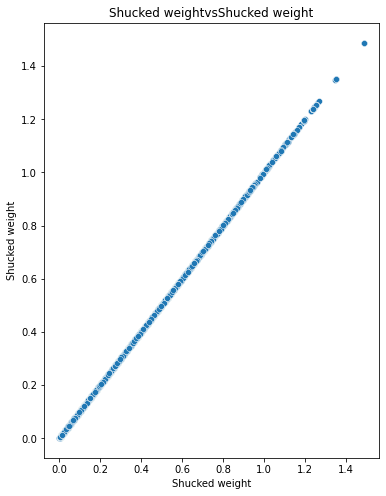

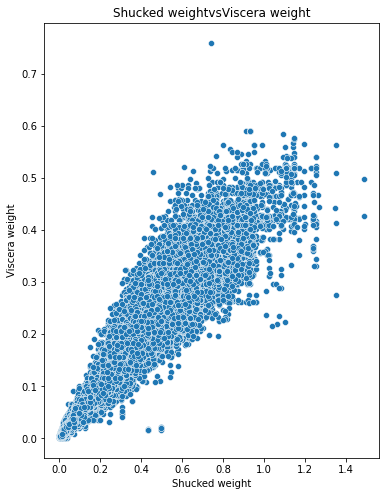

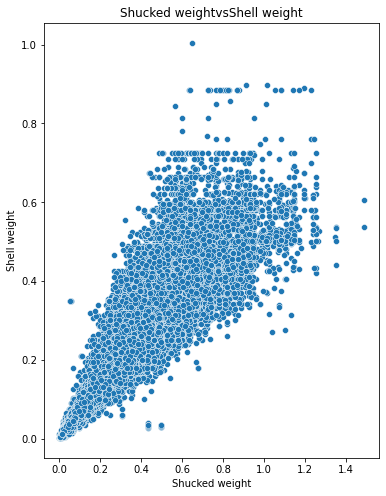

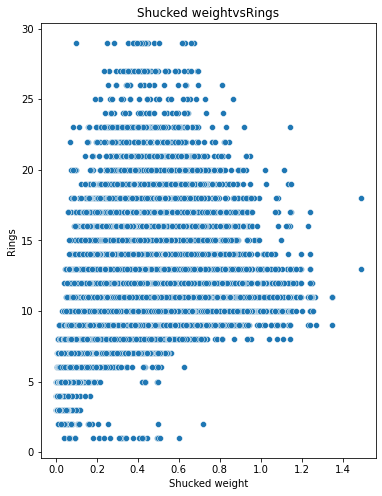

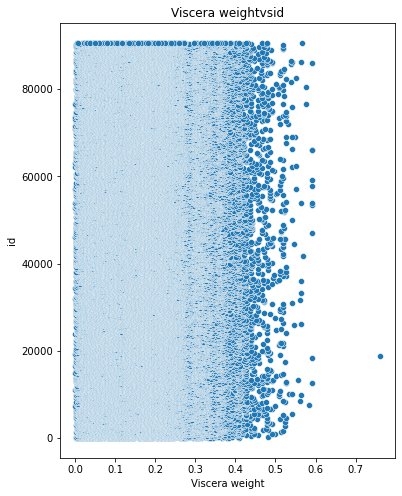

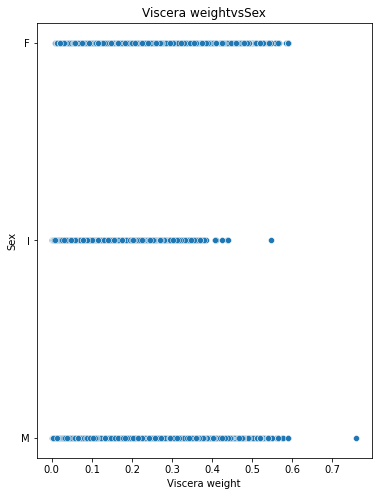

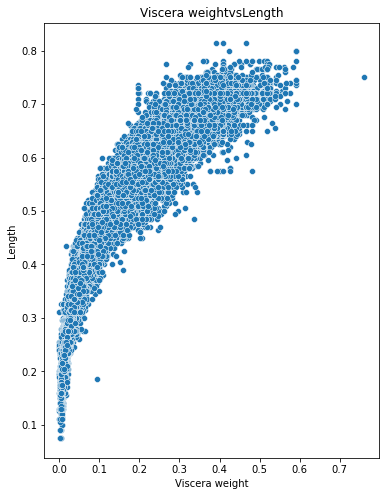

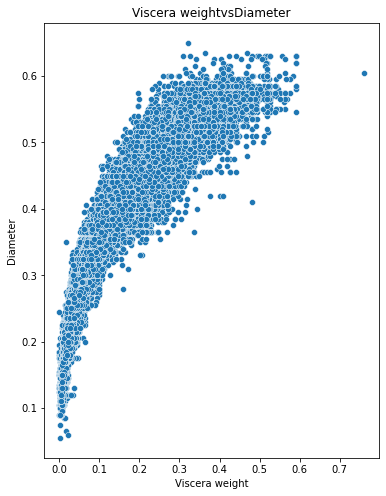

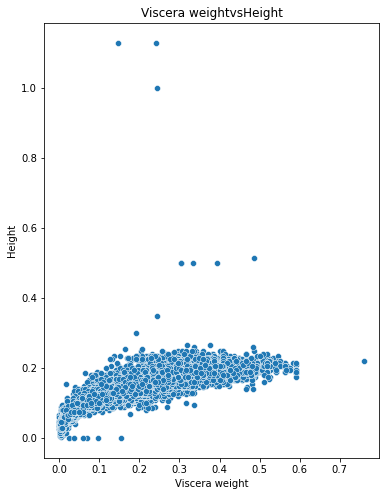

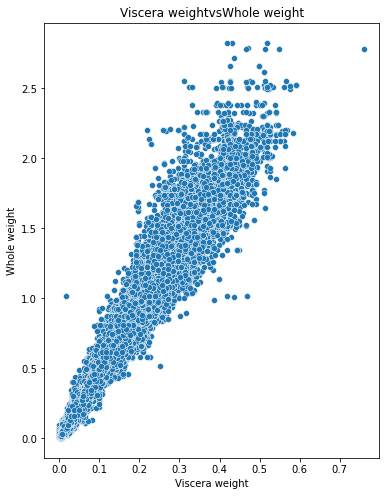

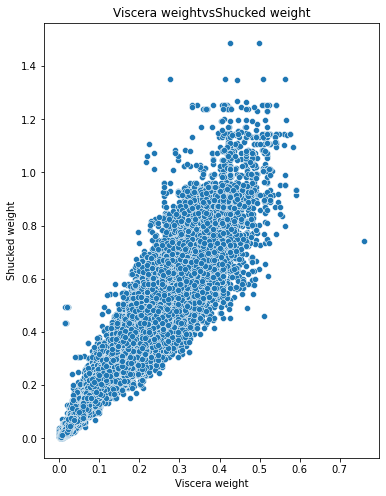

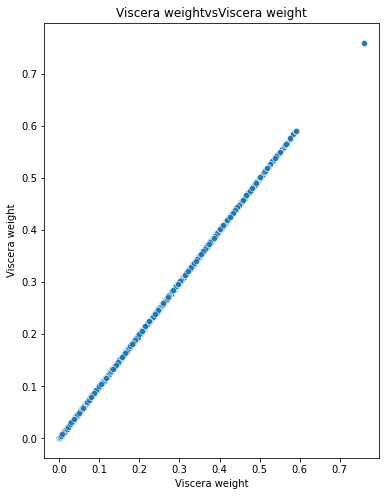

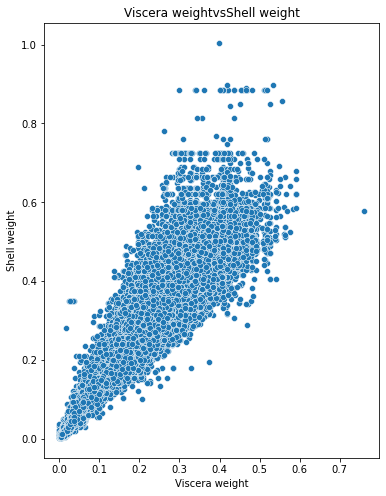

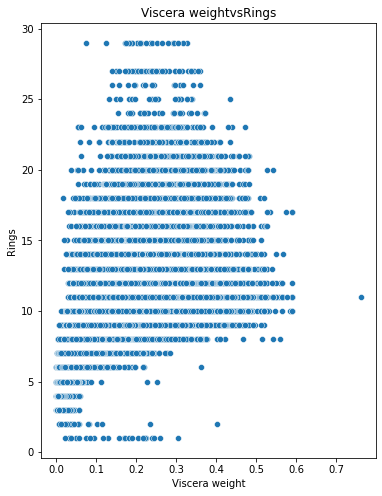

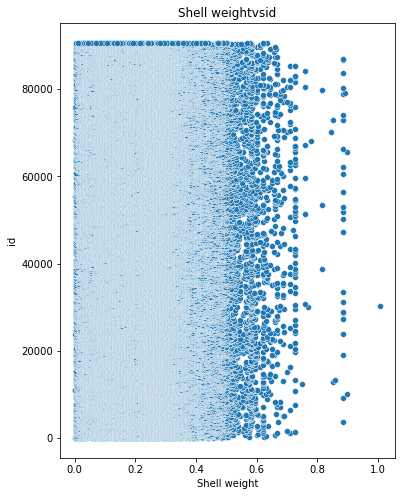

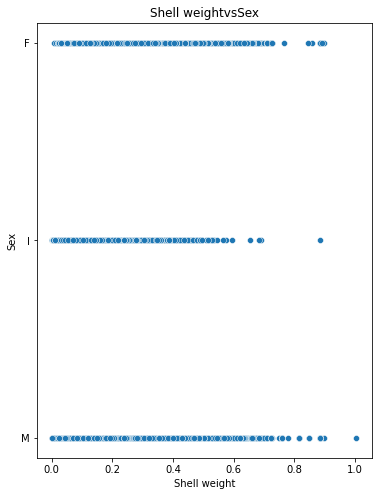

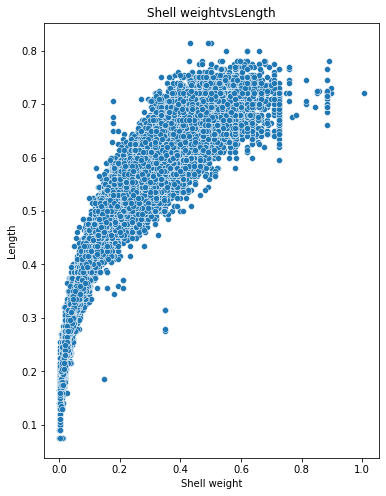

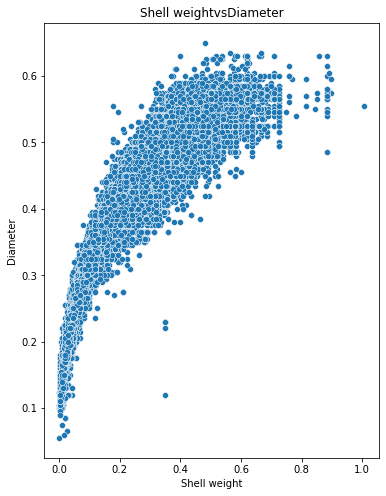

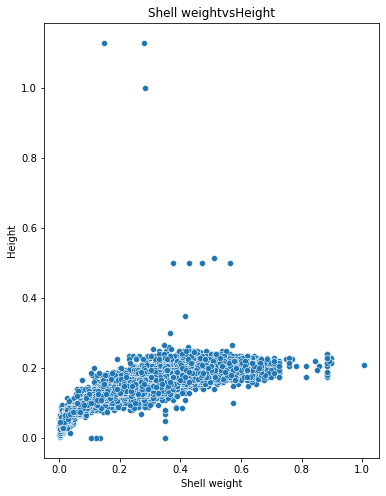

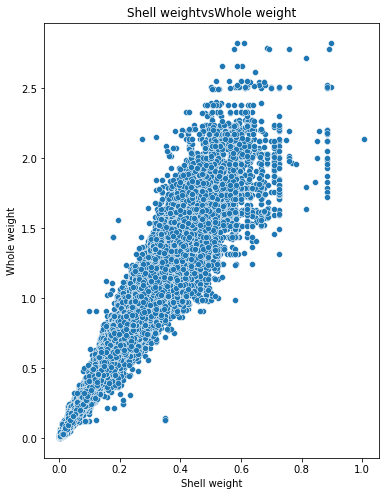

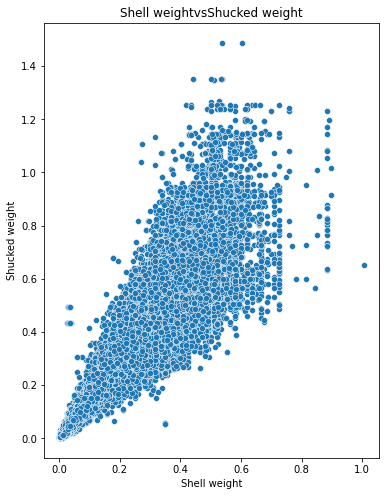

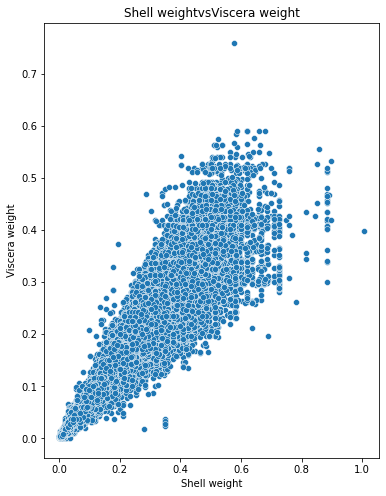

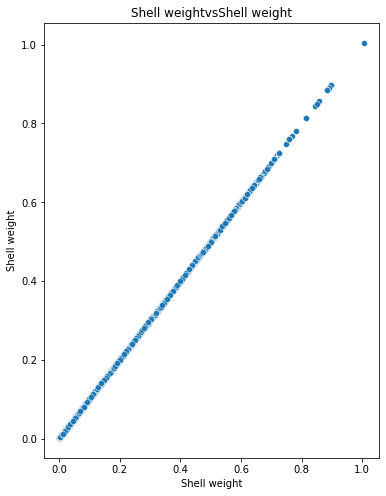

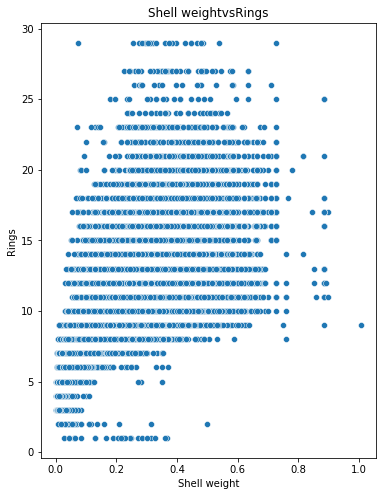

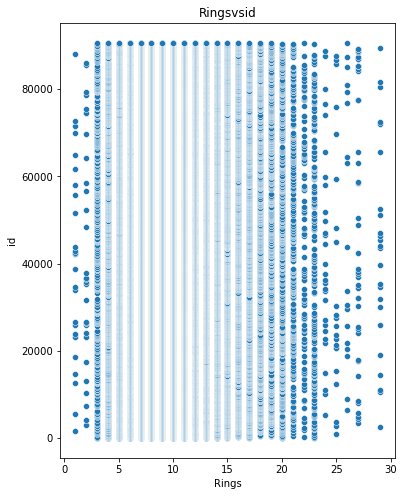

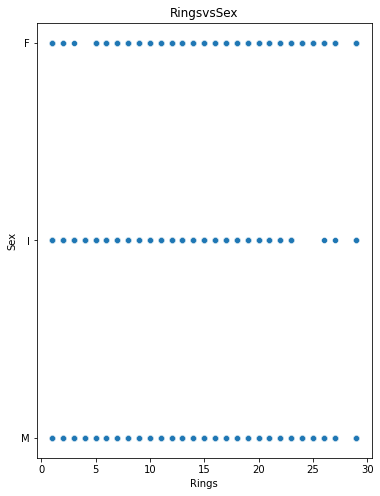

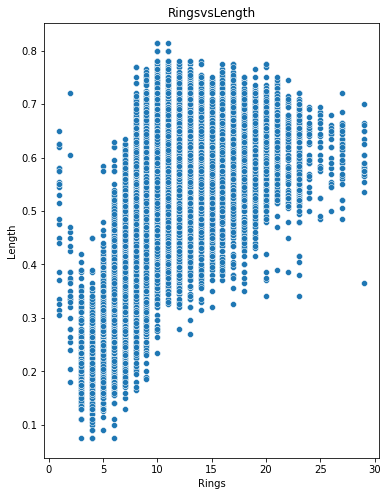

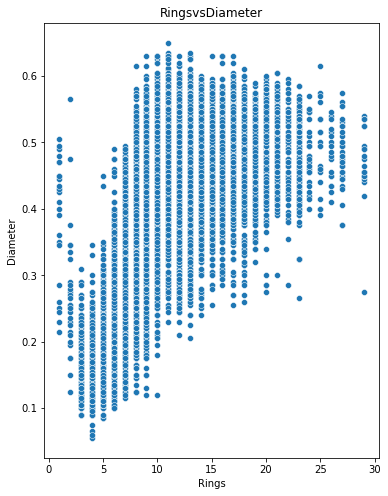

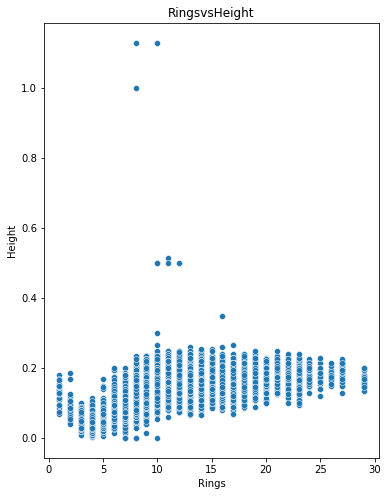

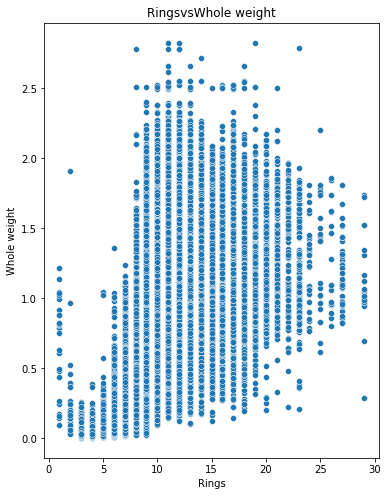

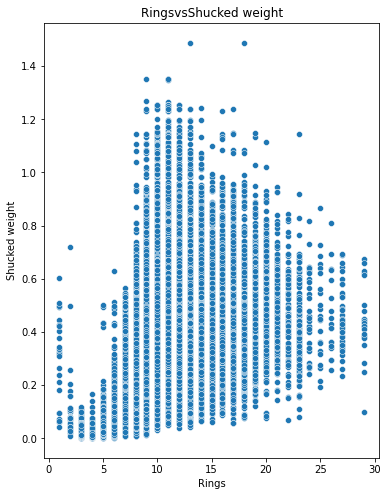

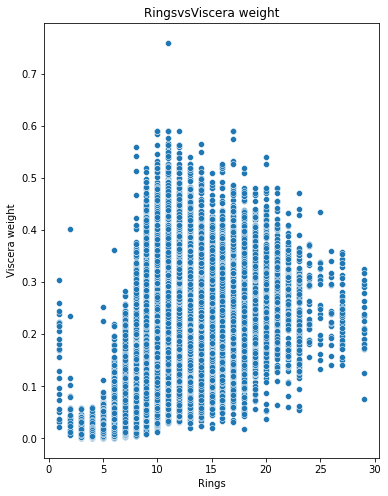

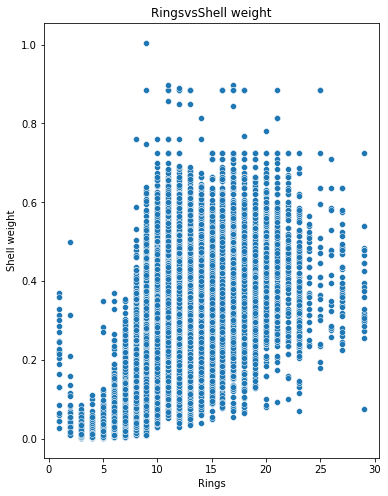

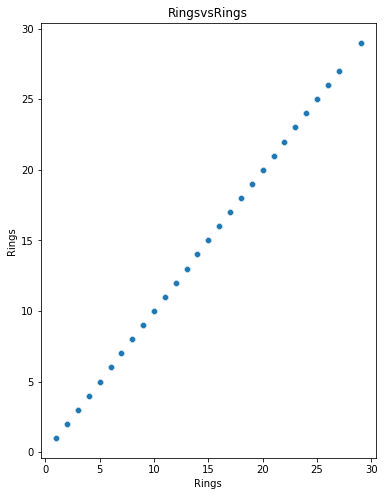

In [19]:
for col in train.columns:
    for coln in train.columns:
        plt.figure(figsize=(6,8))
        sns.scatterplot(x=col,y=coln,data=train)
        plt.title(f'{col}vs{coln}')
        plt.xlabel(col)
        plt.ylabel(coln)
        plt.show()


## Insights
As the length increases, the diameter increases(almost of a linear relationship)

Initally, the height increases as the length increases but after certain point(0.5 length), the height becomes constant irrespective of the increase in length

Length and whole weight has a exponential growth (which is as length increases whole weight almost becomes twice)

Length and Shucked weight has a curved growth ( as the length goes more than 0.5, there is a sudden increase in the weight)

Length and Viscera weight almost has a linear relationship (with some curveness in the graph)

Length and Shell Weight have curved growth ( but the shell weight suddenly increases as the length goes more than 0.5)

Diameter as the same relationship as length with all other variables

Height remains constant after the initial increase almost (0.3-0.4) for all the other variables , some outliers are found

The shucked weight,viscera weight, shell weight grows less than half the size of the whole weight

shucked weight , shell weight have almost linear relationship with viscera with the points of deviation 0.1-0.3

In [20]:
train_corr = train.corr()

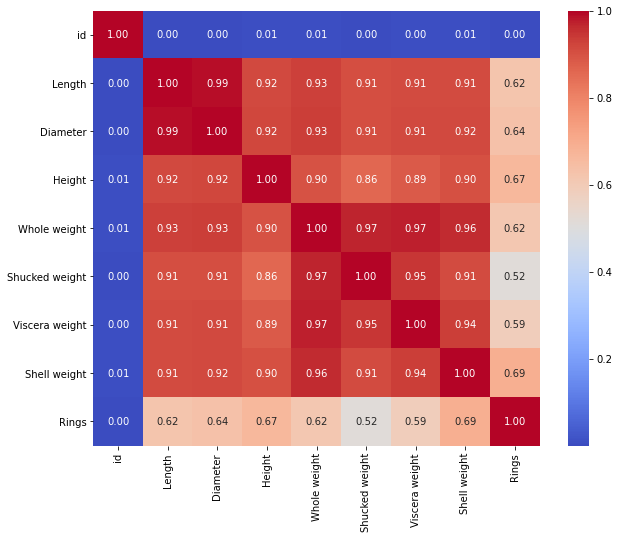

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [22]:
# Feature engineering and encoding

In [23]:
train['circumference'] = math.pi * train['Diameter']

In [24]:
train_corr = train.corr()

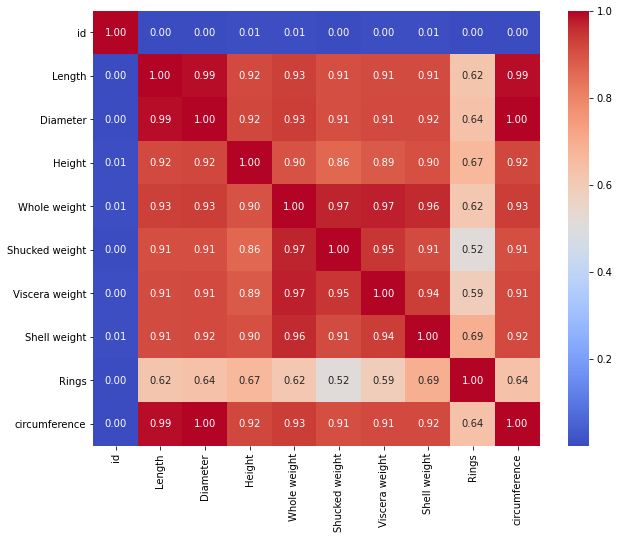

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [26]:
train['shell_volume'] = math.pi*(train['Diameter']/2)**2*train['Length']

In [27]:
train_corr = train.corr()

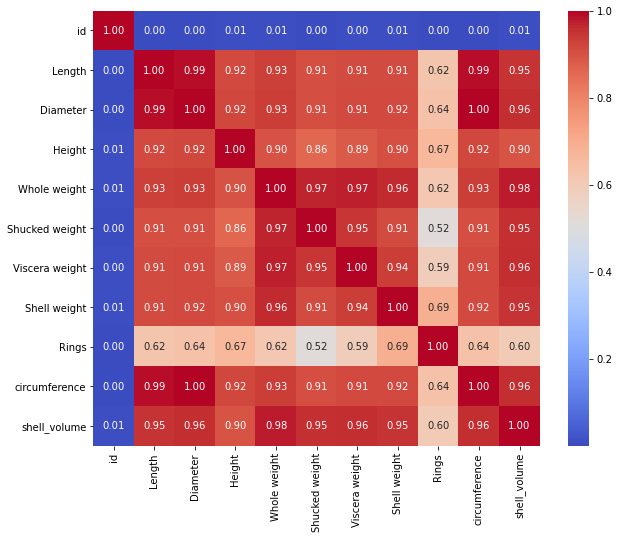

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [29]:
train['meat_volume'] = math.pi*(train['Diameter']/2)**2*train['Height']

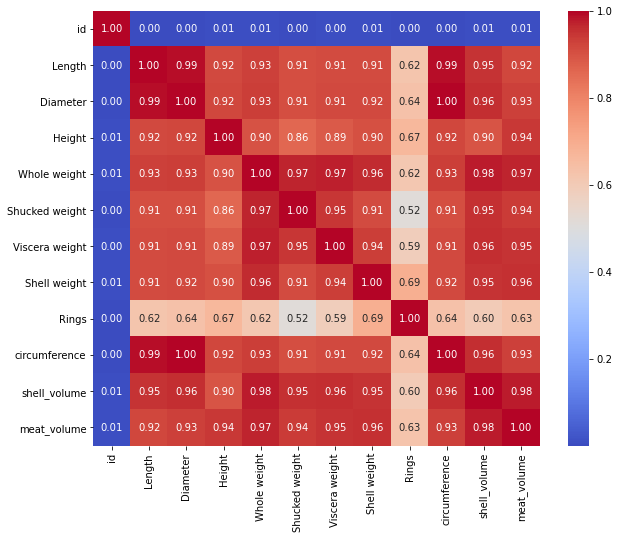

In [30]:
train_corr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [31]:
train['volume_without_meat'] = train['shell_volume'] -train['meat_volume']

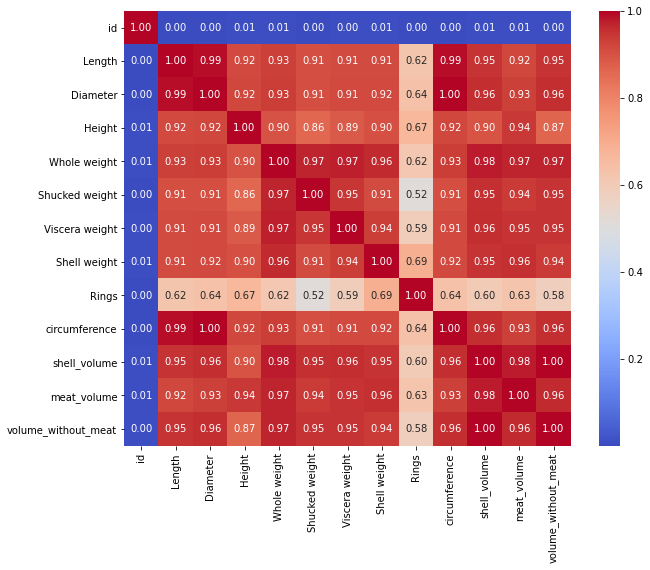

In [32]:
train_corr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [33]:
train['surface_area'] = 2 * math.pi * (train['Diameter']/2) * train['Length'] + math.pi * (train['Diameter']/2)**2 * 2

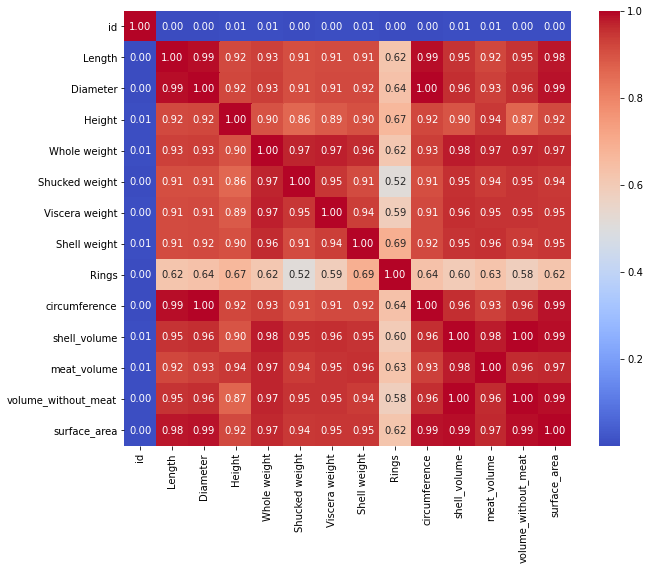

In [34]:
train_corr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [35]:
train = pd.get_dummies(train, columns =['Sex'])

In [36]:
train.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'circumference',
       'shell_volume', 'meat_volume', 'volume_without_meat', 'surface_area',
       'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [37]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [38]:
train=train.drop('id',axis=1)

In [39]:
data['circumference'] = math.pi * data['Diameter']
data['shell_volume'] =  math.pi*(data['Diameter']/2)**2*data['Length']
data['meat_volume'] = math.pi*(data['Diameter']/2)**2*data['Height']
data['volume_without_meat'] = data['shell_volume'] -data['meat_volume']
data ['surface_area'] = 2 * math.pi * (data['Diameter']/2) * data['Length'] + math.pi * (data['Diameter']/2)**2 * 2


In [40]:
test['circumference'] = math.pi * test['Diameter']
test['shell_volume'] =  math.pi*(test['Diameter']/2)**2*test['Length']
test['meat_volume'] = math.pi*(test['Diameter']/2)**2*test['Height']
test['volume_without_meat'] = test['shell_volume'] -test['meat_volume']
test['surface_area'] = 2 * math.pi * (test['Diameter']/2) * test['Length'] + math.pi * (test['Diameter']/2)**2 * 2

In [41]:
test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'circumference',
       'shell_volume', 'meat_volume', 'volume_without_meat', 'surface_area'],
      dtype='object')

In [42]:
data = pd.get_dummies(data,columns=['Sex'])

In [43]:
test = pd.get_dummies(test,columns=['Sex'])

In [44]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'circumference',
       'shell_volume', 'meat_volume', 'volume_without_meat', 'surface_area',
       'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [45]:
test.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'circumference', 'shell_volume',
       'meat_volume', 'volume_without_meat', 'surface_area', 'Sex_F', 'Sex_I',
       'Sex_M'],
      dtype='object')

In [46]:
test_1 = test.drop('id',axis=1)

In [47]:
train = pd.concat([train,data]).drop_duplicates()

In [48]:
X = train.drop('Rings',axis=1)
y = train['Rings']

In [49]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
def prediction(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    score = np.sqrt(msle(y_valid,y_pred))
    print(f'{model},score:{score}')

In [51]:
model_1 = RandomForestRegressor(n_estimators=500,max_depth=8,min_samples_split=13,min_samples_leaf = 60,random_state=27)          
prediction(model_1)

RandomForestRegressor(max_depth=8, min_samples_leaf=60, min_samples_split=13,
                      n_estimators=500, random_state=27),score:0.15379570065280493


In [66]:
model_2 = XGBRegressor(n_estimators = 500, learning_rate = 0.0896765799823656, max_depth = 8, reg_lambda = 1.003764844090402, min_child_weight = 0.20627702562667777, colsample_bytree = 0.5142803343048419, objective = 'reg:squaredlogerror')
prediction(model_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5142803343048419, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0896765799823656,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=0.20627702562667777, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:squaredlogerror',
             predictor=None, ...),score:0.14894720195432168


In [76]:
model_3 = CatBoostRegressor(n_estimators = 1000,learning_rate = 0.128912681527133, l2_leaf_reg = 1.836927907521674, max_depth = 6, colsample_bylevel = 0.6775373040510968,
                            loss_function = 'RMSE', verbose = False)
prediction(model_3)


<catboost.core.CatBoostRegressor object at 0x000002396D127280>,score:0.15002806061317372


In [74]:
model_4 = LGBMRegressor(n_estimators = 1000, learning_rate = 0.028622511348472645, colsample_bytree = 0.5757189042456357, reg_lambda = 0.09664116733307193, min_child_samples = 87, num_leaves = 43, verbose = -1)
prediction(model_4)

LGBMRegressor(colsample_bytree=0.5757189042456357,
              learning_rate=0.028622511348472646, min_child_samples=87,
              n_estimators=1000, num_leaves=43, reg_lambda=0.09664116733307193,
              verbose=-1),score:0.14967826799710354


In [78]:
basemodels=[
    ('XGBoost',XGBRegressor(n_estimators = 500, learning_rate = 0.0896765799823656, max_depth = 8, reg_lambda = 1.003764844090402, min_child_weight = 0.20627702562667777, colsample_bytree = 0.5142803343048419, objective = 'reg:squaredlogerror')),
    ('CatBoost',CatBoostRegressor(n_estimators = 1000,learning_rate = 0.128912681527133, l2_leaf_reg = 1.836927907521674, max_depth = 6, colsample_bylevel = 0.6775373040510968,
                            loss_function = 'RMSE', verbose = False)),
    ('RandomForest',RandomForestRegressor(n_estimators=500,max_depth=8,min_samples_split=13,min_samples_leaf = 60,random_state=27)),
    ('LGBM', LGBMRegressor(n_estimators = 1000, learning_rate = 0.028622511348472645, colsample_bytree = 0.5757189042456357, reg_lambda = 0.09664116733307193, min_child_samples = 87, num_leaves = 43, verbose = -1))
]

In [79]:
meta_model = XGBRegressor(n_estimators = 500, learning_rate = 0.0896765799823656, max_depth = 8, reg_lambda = 1.003764844090402, min_child_weight = 0.20627702562667777, colsample_bytree = 0.5142803343048419, objective = 'reg:squaredlogerror')

In [80]:
stacking_model = StackingRegressor(estimators = basemodels,final_estimator = meta_model)
prediction(stacking_model)

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5142803343048419,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraint...
                                               importance_type=None,
                                               

In [60]:
y_prediction = model_2.predict(test_1)

In [61]:
y_prediction

array([ 9.955784,  9.811262, 10.018628, ..., 12.001309, 13.520309,
        8.396209], dtype=float32)

In [62]:
submission = pd.DataFrame({'id':test['id'],'Rings':y_prediction})

In [63]:
submission.head()

id      Rings
0  90615   9.955784
1  90616   9.811262
2  90617  10.018628
3  90618  10.189980
4  90619   7.671165

In [64]:
submission.to_csv('submission.csv',index=False)